In [1]:
import json 
import pandas as pd 

# with open('/Users/eiphyusinn/Desktop/Data_science_project/data/properties.json', 'r') as f:
with open('/home/gwm-279/Documents/Data_science_end_to_end/data/properties.json','r') as f:
    data = json.load(f)
    data_df = pd.DataFrame(data)
data_df.head(2)


,title,price,property_id,details
0,Spacious Penthouse in Mayangone,"$4,500 /Month",150515,"{'property_type': 'Penthouse', 'township': 'Ma..."
1,Modern 3 Bed Crystal Residence,"$2,300 /Month",150469,"{'property_type': 'Condo', 'township': 'Kamayu..."


In [2]:
data_df = pd.json_normalize(data) 
data_df.head(2)

,title,price,property_id,details.property_type,details.township,details.bedrooms,details.property_size
0,Spacious Penthouse in Mayangone,"$4,500 /Month",150515,Penthouse,Mayangone,3,6000 ft²
1,Modern 3 Bed Crystal Residence,"$2,300 /Month",150469,Condo,Kamayut,3,2000 ft²


In [3]:
df = data_df[['details.property_type', 'details.township', 'details.bedrooms', 'details.property_size','price']]
df.columns = ['property_type', 'township', 'bedrooms', 'property_size', 'price']

df.head(2)

,property_type,township,bedrooms,property_size,price
0,Penthouse,Mayangone,3,6000 ft²,"$4,500 /Month"
1,Condo,Kamayut,3,2000 ft²,"$2,300 /Month"


In [4]:
df.dtypes

property_type    object
township         object
bedrooms         object
property_size    object
price            object
dtype: object

In [5]:
df.isna().sum()

property_type     0
township          0
bedrooms         70
property_size     7
price             0
dtype: int64

Drop rows with null property size.
Fill 0 for null bedrooms.

In [6]:
df = df.copy() 
df.dropna(subset=['property_size'], inplace=True)
df['bedrooms'] = df['bedrooms'].fillna('0')
df.isna().sum()

property_type    0
township         0
bedrooms         0
property_size    0
price            0
dtype: int64

In [7]:
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce').fillna(0).astype(int)

1.  Remove 'ft²' in property_size columns.
2.  For value like this >> "property_size": "400 to 710 ft²" >> takes the average value.

In [8]:
def parse_size(x):
    x = x.replace("ft²", "").strip()
    if "to" in x:
        nums = [int(n.strip()) for n in x.split("to")]
        return sum(nums) // len(nums)  
    try:
        return int(x)
    except:
        return 0 

df['property_size'] = df['property_size'].apply(parse_size)


1.  Remove rows where price is "Contact for price" or contains "for sale". 
2.  Remove "/Month" and "$"
3.  For rows like this >> "price": "$2,000 - $3,700 /Month",take the average. 

In [9]:
# Remove rows where price is "Contact for price" or contains "for sale"
df = df[~df['price'].str.strip().str.lower().isin(['contact for price'])] 
df = df[~df['price'].str.strip().str.lower().str.contains('for sale')]  

def parse_price(x):
    x = x.replace("/Month", "").replace("$", "").replace(",", "").strip()
    if '-' in x:
        nums = [int(n.strip()) for n in x.split('-')]
        return sum(nums) // len(nums) 
    return int(x)

df['price'] = df['price'].apply(parse_price)


In [10]:
df.head(2)

,property_type,township,bedrooms,property_size,price
0,Penthouse,Mayangone,3,6000,4500
1,Condo,Kamayut,3,2000,2300


In [12]:
df.to_csv('/home/gwm-279/Documents/Data_science_end_to_end/data/properties.csv')

In [47]:
data = pd.read_csv('/home/gwm-279/Documents/Data_science_end_to_end/data/properties.csv',index_col=False)
data = data.drop('Unnamed: 0', axis=1)

In [19]:
data.describe()

,bedrooms,property_size,price
count,831.000000,831.000000,831.000000
mean,3.099880,2937.521059,2574.075812
std,2.024759,4412.275452,2220.712444
min,0.000000,200.000000,310.000000
25%,2.000000,1250.000000,1200.000000
50%,3.000000,1800.000000,2000.000000
75%,4.000000,3000.000000,3500.000000
max,22.000000,64000.000000,25000.000000


In [40]:
data['property_type'].value_counts()

property_type
Condo                 375
House                 297
Penthouse              49
Commercial             39
Serviced Apartment     37
Apartment              30
Office Space            1
Apartment, Condo        1
Condo, Penthouse        1
Serviced Office         1
Name: count, dtype: int64

Property type is inbalanced. So I removed classes under 10 counts and replace "Condo, Penthouse" > "Penthouse" and "Apartment, Condo" > "Condo"

In [50]:
def parse_property_type(x):
    x = str(x).strip()
    if "," in x:
        return x.split(',')[1].strip()
    return x
    
data['property_type'] = data['property_type'].apply(parse_property_type)
counts = data['property_type'].value_counts()
data = data[data['property_type'].isin(counts[counts>10].index)]
data['property_type'].value_counts()

property_type
Condo                 376
House                 297
Penthouse              50
Commercial             39
Serviced Apartment     37
Apartment              30
Name: count, dtype: int64

In [25]:
data['township'].value_counts()

township
Golden Valley           150
Sanchaung               123
Yankin                   94
Bahan                    83
Mayangone                74
Kamayut                  60
Hlaing                   58
Downtown                 49
Yawmingyi                21
Ahlone                   18
Mingalar taung Nyunt     14
Thingangyun              14
Hlaingthaya              14
Thanlyin                 13
Tamwe                    13
South Okkalapa           12
Thaketa                   4
Mingalardon               4
Dagon Myothit             3
Kyimyindaing              3
Dagon                     2
Insein                    2
Hleden                    2
North Okkalapa            1
Name: count, dtype: int64

Township is class-inbalanced. So I removed classes under 10

In [35]:
counts = data['township'].value_counts()

data = data[data['township'].isin(counts[counts > 10].index)]
data['township'].value_counts()

township
Golden Valley           150
Sanchaung               123
Yankin                   94
Bahan                    83
Mayangone                74
Kamayut                  60
Hlaing                   58
Downtown                 49
Yawmingyi                21
Ahlone                   18
Thingangyun              14
Hlaingthaya              14
Mingalar taung Nyunt     14
Tamwe                    13
Thanlyin                 13
South Okkalapa           12
Name: count, dtype: int64

In [56]:
data.head(2)

,property_type,township,bedrooms,property_size,price
0,Penthouse,Mayangone,3,6000,4500
1,Condo,Kamayut,3,2000,2300


Data Visualization

Kdeplot for numerical columns

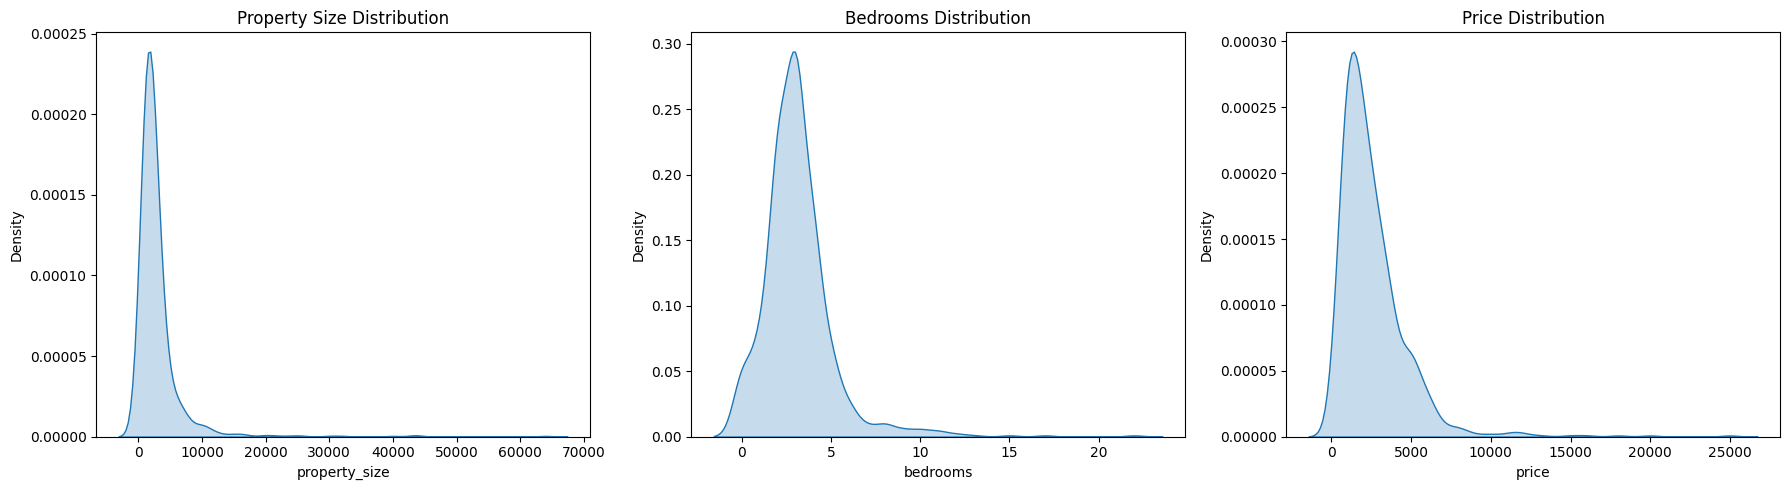

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data['property_size'], fill=True, ax=axes[0])
axes[0].set_title('Property Size Distribution')

sns.kdeplot(data['bedrooms'], fill=True, ax=axes[1])
axes[1].set_title('Bedrooms Distribution')

sns.kdeplot(data['price'], fill=True, ax=axes[2])
axes[2].set_title('Price Distribution')

plt.tight_layout()
plt.show()


Histogram for Categorical columns

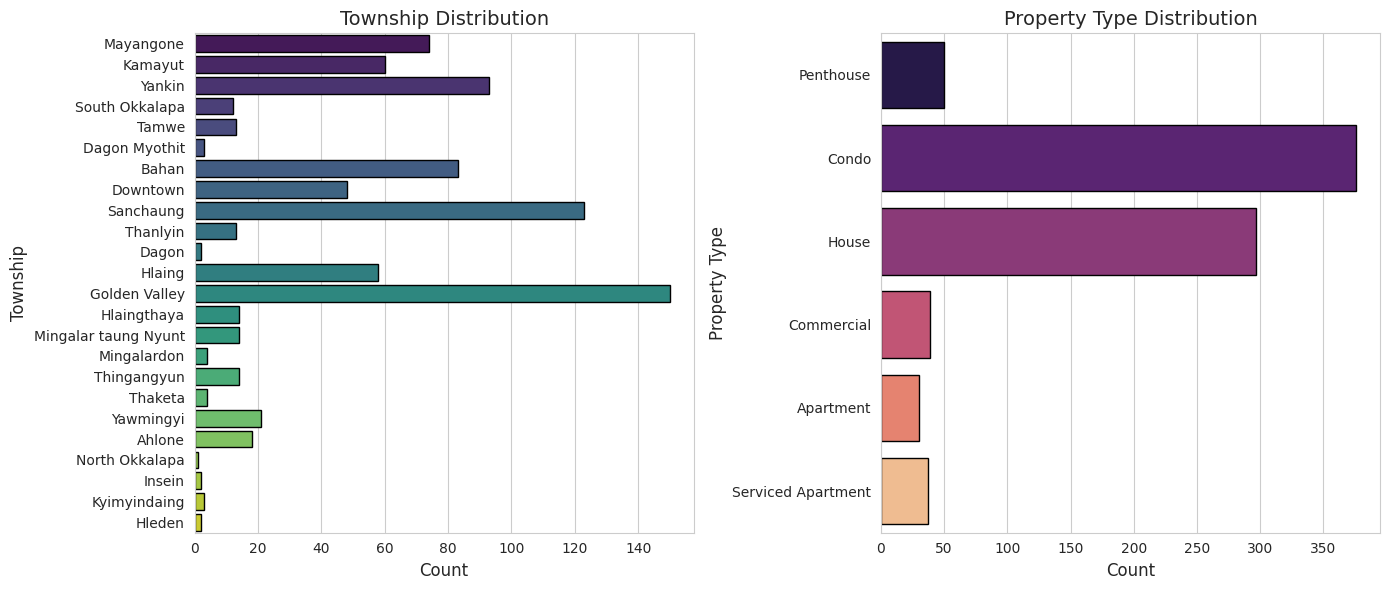

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(y='township', data=data, hue='township', ax=axes[0],
              palette="viridis", edgecolor='black', dodge=False, legend=False)
axes[0].set_title('Township Distribution', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Township', fontsize=12)

sns.countplot(y='property_type', data=data, hue='property_type', ax=axes[1],
              palette="magma", edgecolor='black', dodge=False, legend=False)
axes[1].set_title('Property Type Distribution', fontsize=14)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Property Type', fontsize=12)

plt.tight_layout()
plt.show()


Price Distribution by different columns

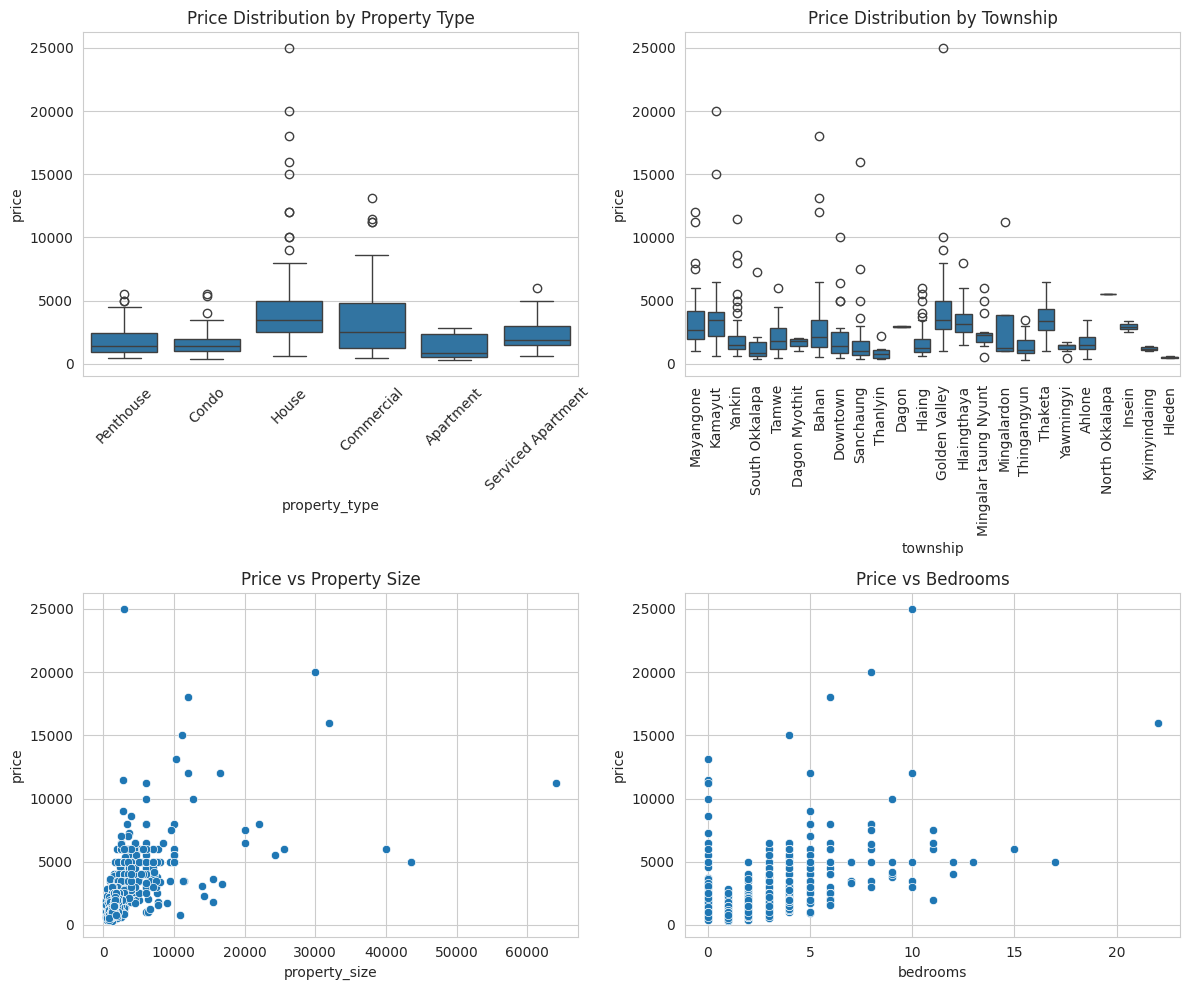

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot: property_type vs price
sns.boxplot(x='property_type', y='price', data=data, ax=axes[0,0])
axes[0,0].set_title('Price Distribution by Property Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Boxplot: township vs price
sns.boxplot(x='township', y='price', data=data, ax=axes[0,1])
axes[0,1].set_title('Price Distribution by Township')
axes[0,1].tick_params(axis='x', rotation=90)

# Scatterplot: property_size vs price
sns.scatterplot(x='property_size', y='price', data=data, ax=axes[1,0])
axes[1,0].set_title('Price vs Property Size')

# Scatterplot: bedrooms vs price
sns.scatterplot(x='bedrooms', y='price', data=data, ax=axes[1,1])
axes[1,1].set_title('Price vs Bedrooms')
plt.tight_layout() 
plt.savefig('/home/gwm-279/Documents/Data_science_end_to_end/data/price_distribution.png')
plt.show()



Correlation between numeric variables

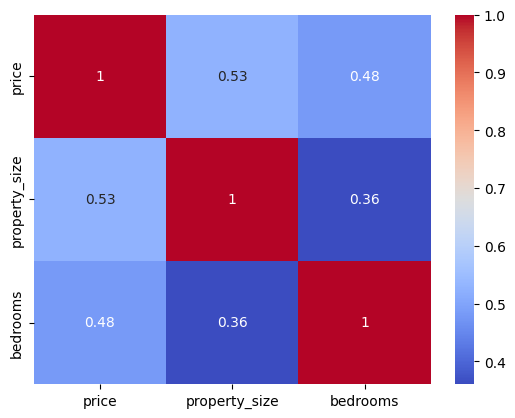

In [69]:
corr = data[['price','property_size','bedrooms']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [83]:
data.to_csv('/home/gwm-279/Documents/Data_science_end_to_end/data/processed_data.csv',index=False)